<a href="https://colab.research.google.com/github/Tiausa/CloudAPI/blob/master/Copy_of_Module06_lecturea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 6 - Compressing Data via Dimensionality Reduction

# Review

**“No Free Lunch” theorem** tells us no algorithm can work best for every problem, especially for supervised learning.

Thus, often we try different algorithms to solve a problem, while using a hold-out **test set** of data to evaluate performance and select the winner.

Eventually, we will pick an algorithm that is suitable for the data and problem.

**It is important to be familiar with the common machine learning algorithms. Here is a summary:**

### Linear

1. Perceptron, Adline (Classification)
2. [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) (Regression)
3. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (Classification)
4. Linear SVM (C, R)

**Strengths:** 

- easy to explain (interpretable)
- easy to compute

**Weaknesses:** 

- usually performs poorly for non-linear relationships or non-linear decision boundary

### Nonlinear

5. [Kernel SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (C, R)
6. Decision Tree (C, R)
7. [Ensemble Trees](https://scikit-learn.org/stable/modules/ensemble.html) (Random Forest, Gradient Boost Tree) (C, R)
8. [K Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) (C, R)

**Strengths:** 

- can learn non-linear relationships and boundaries
- Random Forest is scalable easily

**Weaknesses:**

- the interpretation is difficult
- easy to overfitting
- KNN is memory-intensive, perform poorly for high-dimensional data 

**In practice**, linear regression, logistic regression, and tree ensembles are often used.

**Question 6-1**: As to each of the method mentioned above, how to make the model less prone to overfitting?

# Overview

- [Unsupervised dimensionality reduction via principal component analysis (PCA)](#Unsupervised-dimensionality-reduction-via-principal-component-analysis)
- [Supervised data compression via linear discriminant analysis (LDA)](#Supervised-data-compression-via-linear-discriminant-analysis)
- [Using kernel principal component analysis for nonlinear mappings](#Using-kernel-principal-component-analysis-for-nonlinear-mappings)

**Question 6-2:** 

What is the difference between unsupervised and supervised learning?

## Unsupervised dimensionality reduction via **Principal Component Analysis (PCA)**

In machine learning, **dimensionality** simply means the number of features (i.e. independent variables) in the dataset.

When the number of features is very large relative to the number of observations in the dataset, many algorithms struggle to train effective models. This is called the “Curse of Dimensionality”.

We have learned **feature selection**, which is for filtering irrelevant or redundant features from the dataset. 

**Question 6-3:** What methods we learned before can do the feature selection?

Another method to reduce the dimensionality is **feature extraction**.
The key difference between feature selection and extraction is that **feature selection keeps a subset of the original features while feature extraction creates brand new ones**.

## The main steps behind Principal Component Analysis (PCA)

PCA helps us to identify patterns in data based on the correlation between
features. In short, PCA aims to find the **directions of maximum variance** in high-dimensional data and **projects it onto a new subspace** with equal or fewer dimensions than the original one. 

**Principal components** of the new subspace can be interpreted as the **directions of maximum variance** given the constraint that the new feature axes are orthogonal to each other (uncorrelated to each other), as illustrated in the following figure:

<div>
<img src="https://github.com/franklin-univ-data-science/data/blob/master/images/05_01.png?raw=true" width="600"/>
</div>

Given a $n\times d$ feature matrix **X**:

$ \textbf{X} = [x_1, x_2, x_3, \dotsc, x_d], x \in \mathbb{R}^{n \times d}$


times a $d \times k$ matrix **W**,

$\textbf{W} \in \mathbb{R}^{d \times k}$


get a new n by k matrix **Z**:

$ \textbf{Z} = \textbf{X}\textbf{W} = [z_1, z_2, z_3, \dotsc, z_k], z \in \mathbb{R}^{n \times k}$



As a result of transforming the original d-dimensional data onto this new k-dimensional subspace with k principal components (typically k << d), the first principal component will have the largest possible variance, and all components are uncorrelated (orthogonal) to the each other — even if the input features are correlated, the resulting principal components will be mutually orthogonal (uncorrelated). 

**Note that the PCA directions are highly sensitive to data scaling**. When the features were measured on different scales, we want to assign equal importance to all features. Thus, we need to do feature scaling for the features prior to PCA.

The steps of PCA:

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k ≤ d ).
6. Construct a **projection matrix W** from the "top" k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W
to obtain the new k-dimensional feature subspace.


## Extracting the principal components step-by-step

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Splitting the data into 70% training and 30% test subsets.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values        # setup the X feature matrix and y target vector
 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)        #combine the fit and transform methods
X_test_std = sc.transform(X_test)

In statistics, **variance** is used to describe the spread between a data set from its mean value.

A **covariance** refers to the measure of how two variables will change when they are compared to each other. A positive covariance means both variables tend to move upward or downward at the same time. A negative covariance, on the other hand, means the variables will move away from each other. So when one rises, the other one falls.

Assume we have a feature matrix with n rows and d columns. The covariance between two features $\textbf{x}_j$ and $\textbf{x}_k$ can be calculated by:

$\sigma_{jk} = \frac{1}{n-1}\Sigma_{i=1}^n(x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)$

After standardization, the mean $\mu$ is zero. So, the above formula can be simplified as:

$\sigma_{jk} = \frac{1}{n-1} \textbf{x}_j^T \textbf{x}_k$


**covariance matrix**:

This is a symmetric d × d -dimensional matrix, where d is the number of dimensions in the feature matrix. Covariance matrix stores the **pairwise** covariances between the different features.

As mentioned before, a positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates that the features vary in opposite directions. The **covariance matrix** of three features can then be written as follows (note that ∑ stands for the Greek uppercase letter sigma, which is not to be confused with the sum symbol):


$$
\Sigma = \begin{bmatrix} 
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_2^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_3^2 \\
\end{bmatrix}
$$




In [ ]:
import numpy as np
cov_mat = np.cov(X_train_std.T) # note cov() requests row vectors, so we need a transpose

In [ ]:
cov_mat.shape

(13, 13)

In [ ]:
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

**Eigendecomposition** of the covariance matrix:

The eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance), whereas the corresponding eigenvalues will define their magnitude.

An eigenvector **v** satisfies the following condition:

$\Sigma \textbf{v} = \lambda \textbf{v}$

Here, λ is a scalar: the eigenvalue.


In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Eigenvectors 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953

## Total and explained variance

In [ ]:
tot = sum(eigen_vals) # the total variance
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)


plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

NameError: ignored

<Figure size 1080x720 with 0 Axes>

The resulting plot indicates that the first principal component alone accounts for approximately 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the dataset.

## Feature transformation

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(eigen_vals[i], eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203502,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977349,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578446,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

In [ ]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203502,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977349,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578446,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

In [ ]:
# the most important eigenvector, which as the largest/first eigenvalue in the sorted eigen_pairs
eigen_pairs[0][1]

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [ ]:
# Collect the two eigenvectors that correspond to the two largest eigenvalues,
w = np.array([eigen_pairs[0][1],
              eigen_pairs[1][1]]).T
print('Matrix W:\n', w)             # shape 13x2

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Because after projection using the above W, now we only have two features, we can draw the classes of wine in a plane:

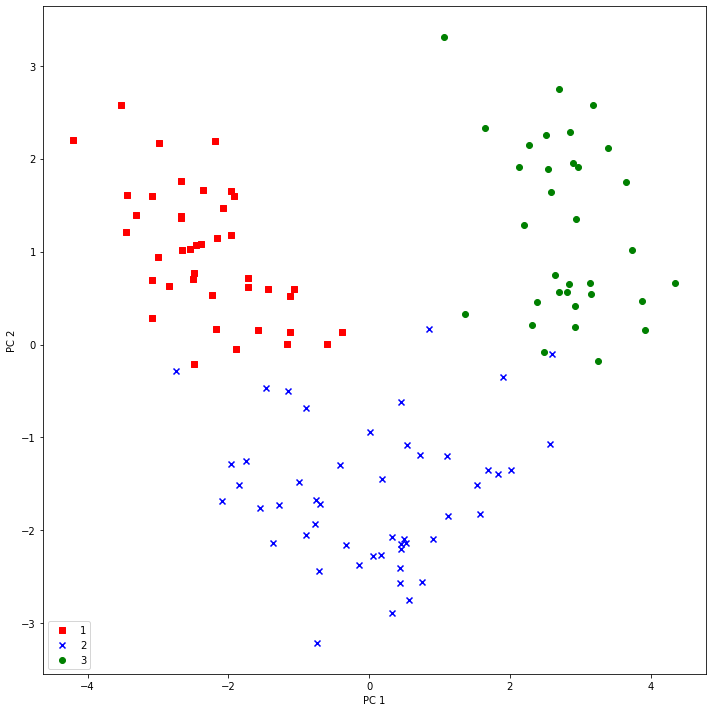

In [ ]:
X_train_pca = X_train_std @ w
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for l, c, m in zip(np.unique(y_train), colors, markers):             #plot w labels for illustration, PCA is unsupervised and does not use label information
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<br>
<br>

Optional: Another way to calculate w using Singular Value Decomposition (SVD):

In [ ]:
U, s, V = np.linalg.svd(X_train_std)
c1 = V.T[:, 0]
c2 = V.T[:, 1]
w = np.array([c1, c2]).T
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

## Principal component analysis in scikit-learn

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

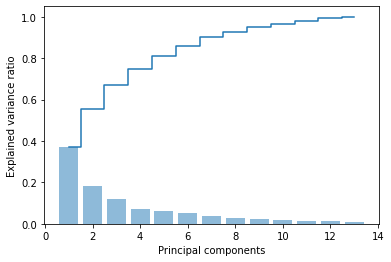

In [ ]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

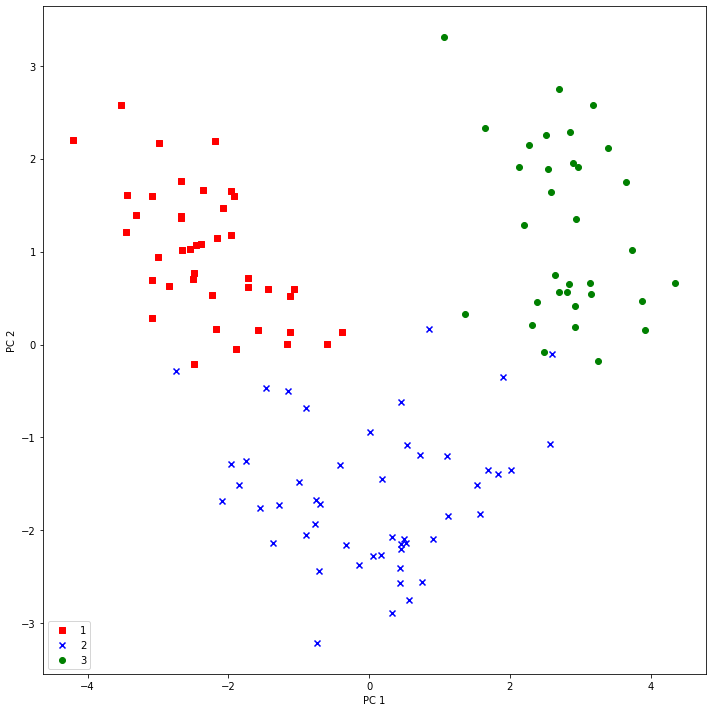

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

Training logistic regression classifier using the first 2 principal components.

In [ ]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)         #restrict to 2 dimensions
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(solver = 'lbfgs', multi_class='auto')
lr = lr.fit(X_train_pca, y_train)

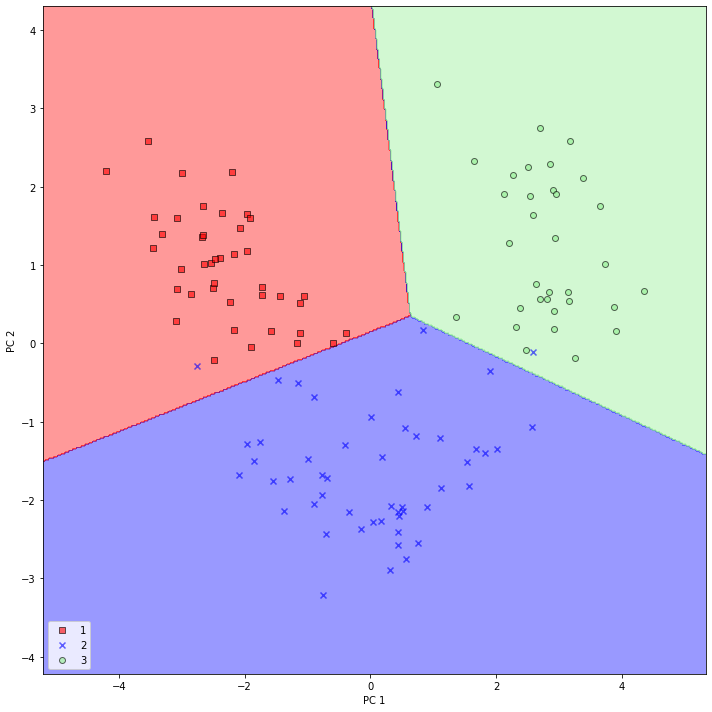

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
pca.components_

array([[-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
        -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
        -0.32613263, -0.36861022, -0.29669651],
       [ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
         0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
        -0.20716433, -0.24902536,  0.38022942]])

In [ ]:
sc.scale_

array([8.23368566e-01, 1.16920747e+00, 2.68077071e-01, 3.32703937e+00,
       1.40557715e+01, 6.14857030e-01, 1.01944562e+00, 1.21181532e-01,
       5.90112089e-01, 2.36010810e+00, 2.20779765e-01, 6.92948052e-01,
       3.25392246e+02])

In [ ]:
pca.components_ @ ((X_train[0] - sc.mean_) / sc.scale_)

array([2.38299011, 0.45458499])

In [ ]:
X_train_std[0]

array([ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
       -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
       -0.20017028, -0.82164144, -0.62946362])

In [ ]:
X_train_pca[0]

array([2.38299011, 0.45458499])

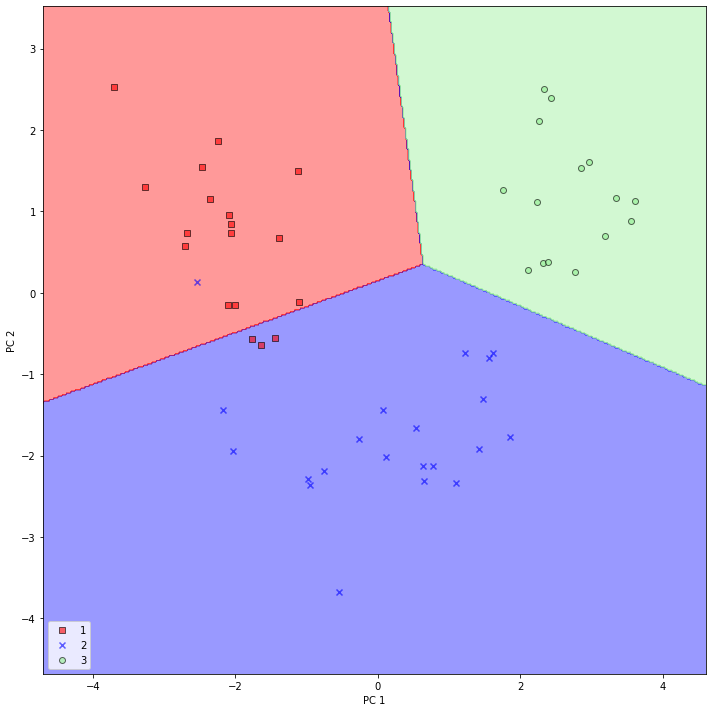

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=None) # list all the eigenvalues
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

**Strengths:** 

- It is fast and simple to implement, which means you can easily test algorithms with and without PCA to compare performance. 
- It offers kernel PCA to provide nonlinear transformation (I will mention this later).

**Weaknesses:**

- The new principal components are not interpretable
- Not easy to apply when features have both the numeric and categorical variables

# Supervised data compression via **linear discriminant analysis (LDA)**

 Unlike PCA, LDA doesn't maximize explained variance. Instead, it maximizes the separability between classes.

<div>
<img src="https://github.com/franklin-univ-data-science/data/blob/master/images/05_06.png?raw=true" width="600"/>
</div>

Here, the x-axis (LD 1), would separate the two normal distributed classes well. 

## LDA via scikit-learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)            #restrict to 2 dimensions for plot
X_train_lda = lda.fit_transform(X_train_std, y_train)

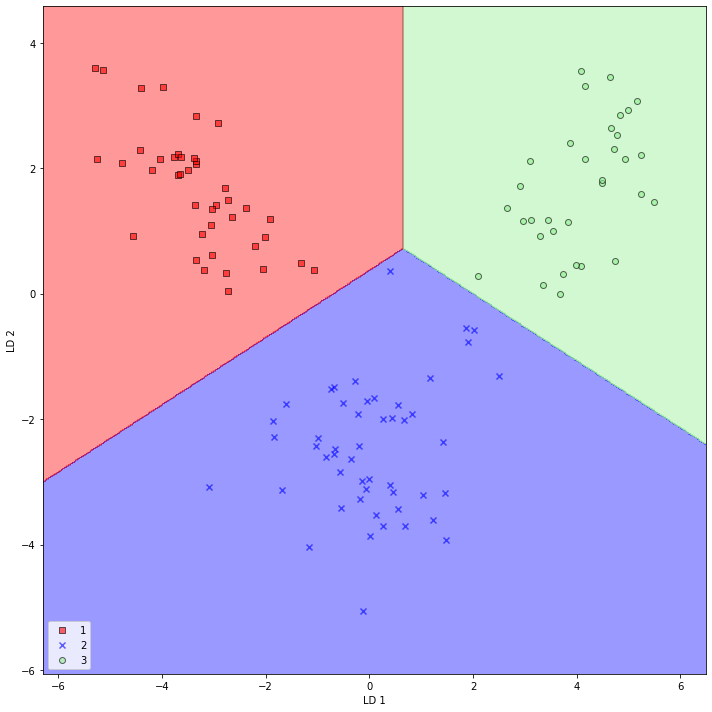

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

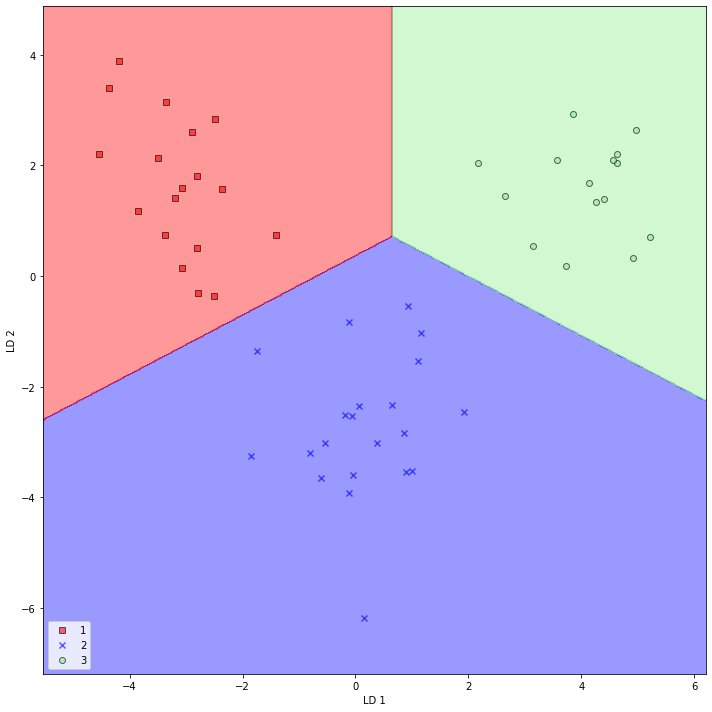

In [ ]:
X_test_lda = lda.transform(X_test_std)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<br>
<br>

# Using **kernel principal component** analysis for nonlinear mappings

<div>
<img src="https://github.com/franklin-univ-data-science/data/blob/master/images/05_11.png?raw=true" width="600"/>
</div>

## Kernel principal component analysis in scikit-learn

### Example: Separating half-moon shapes

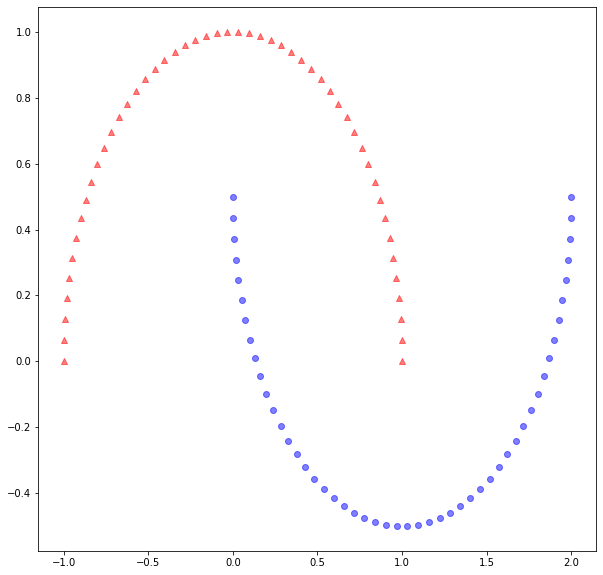

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)


X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1],
            color='blue', marker='o', alpha=0.5)
plt.show()

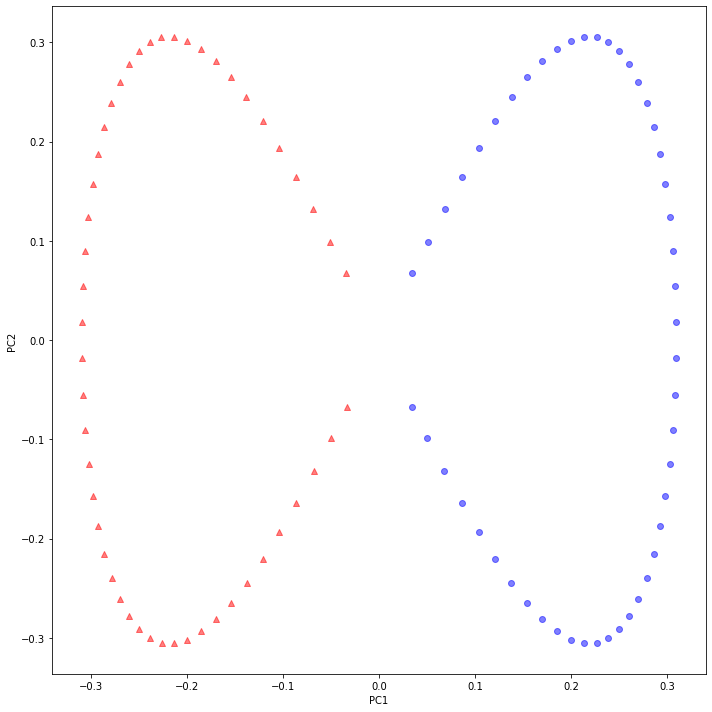

In [ ]:
from sklearn.decomposition import KernelPCA

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=30, degree=2) # larger gamma fits data more closely
X_skernpca = scikit_kpca.fit_transform(X)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

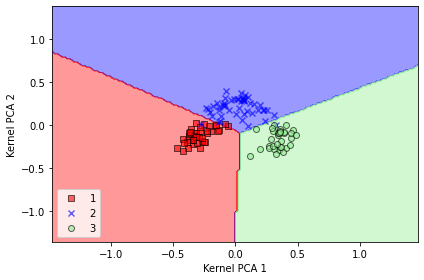

In [ ]:
from sklearn.linear_model import LogisticRegression

scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01, degree=2)       # larger gamma fits data more closely. demo w/ different values
X_skernpca = scikit_kpca.fit_transform(X_train_std)

lr = LogisticRegression(solver='lbfgs', multi_class='auto')
lr = lr.fit(X_skernpca, y_train)

plot_decision_regions(X_skernpca, y_train, classifier=lr)
plt.xlabel('Kernel PCA 1')
plt.ylabel('Kernel PCA 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()